In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np


In [3]:

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

train_images = train_images.reshape((-1, 28 * 28))
test_images = test_images.reshape((-1, 28 * 28))


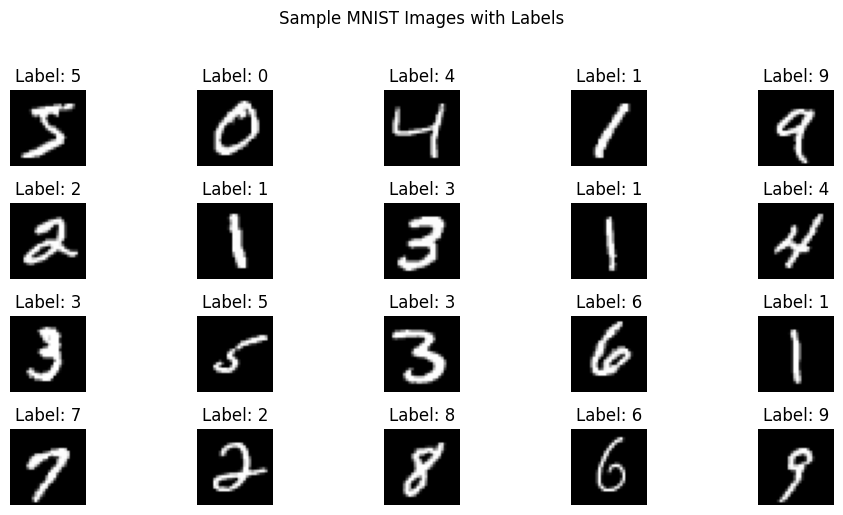

In [4]:
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {train_labels[i]}")
    plt.axis("off")
plt.suptitle("Sample MNIST Images with Labels", y=1.02)
plt.tight_layout()
plt.show()


In [5]:
model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.GaussianNoise(0.1),

    layers.Dense(1024, kernel_regularizer=regularizers.l2(1e-5)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    layers.Dense(512, kernel_regularizer=regularizers.l2(1e-5)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    layers.Dense(256, kernel_regularizer=regularizers.l2(1e-5)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.2),

    layers.Dense(10, activation='softmax')
])


In [6]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

lr_schedule = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)


In [12]:
history = model.fit(
    train_images, train_labels,
    epochs=25,
    batch_size=128,
    validation_data=(test_images, test_labels),
    callbacks=[early_stop, lr_schedule]
)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9987 - loss: 0.0317 - val_accuracy: 0.9882 - val_loss: 0.0697 - learning_rate: 7.8125e-06
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9982 - loss: 0.0326 - val_accuracy: 0.9880 - val_loss: 0.0698 - learning_rate: 7.8125e-06
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9986 - loss: 0.0318 - val_accuracy: 0.9880 - val_loss: 0.0698 - learning_rate: 7.8125e-06
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9988 - loss: 0.0308 - val_accuracy: 0.9883 - val_loss: 0.0700 - learning_rate: 7.8125e-06
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9988 - loss: 0.0312 - val_accuracy: 0.9884 - val_loss: 0.0698 - learning_rate: 7.8125e-06
Epoch 6/25
467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9988 - loss: 0.0313
Epoch 6: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - ac

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9851 - loss: 0.0802

Test Accuracy: 0.9880


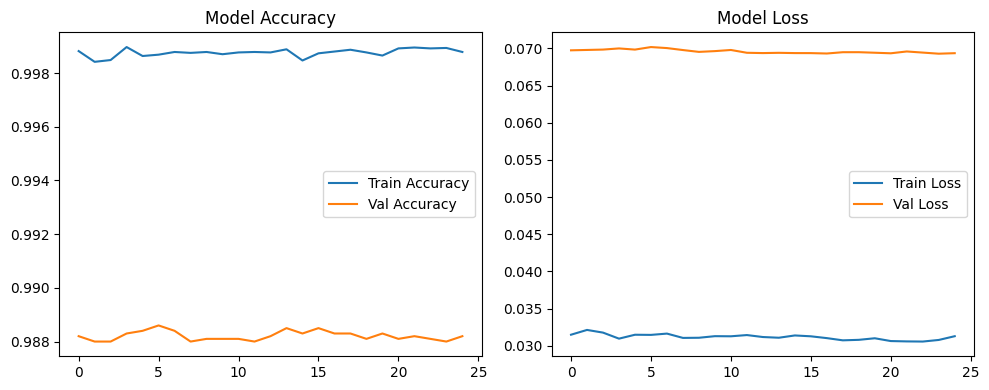

In [14]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Model Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Model Loss")
plt.legend()

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


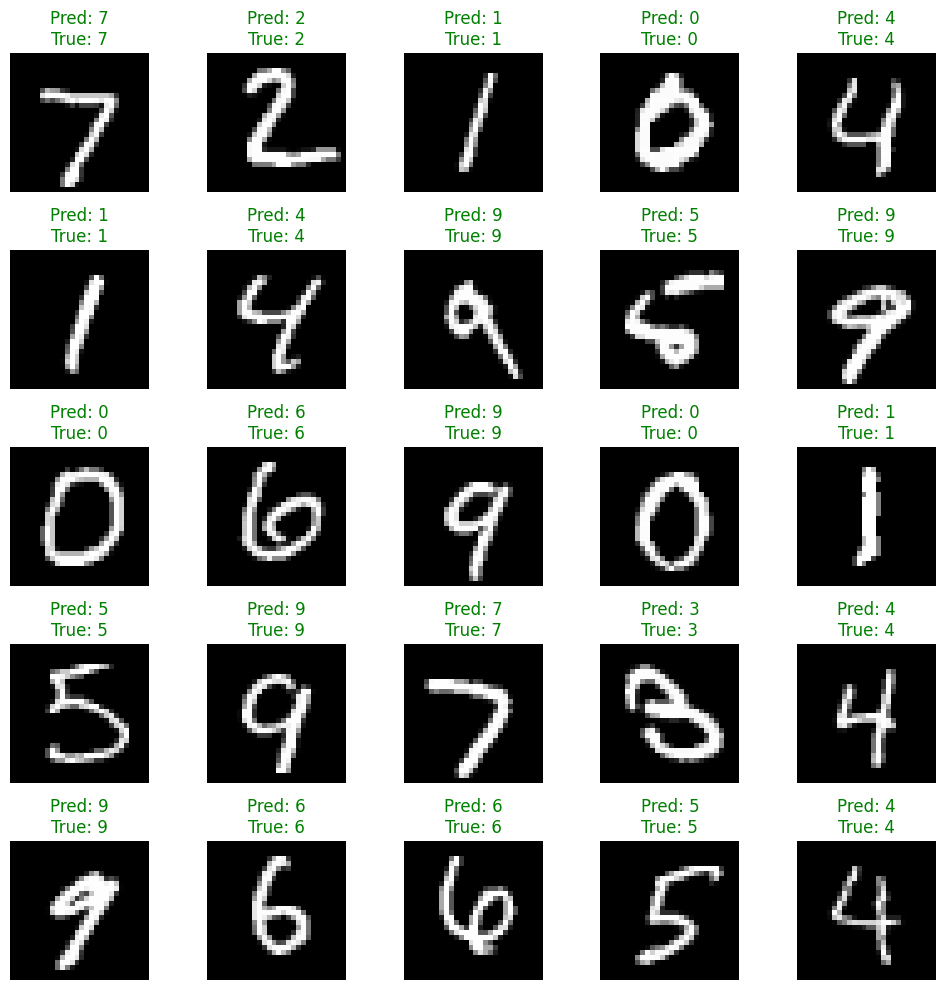

In [15]:
predictions = model.predict(test_images)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
    pred_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    color = "green" if pred_label == true_label else "red"
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis("off")
plt.tight_layout()
plt.show()
